In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
from bokeh.io import output_notebook
from bokeh.sampledata import us_states
from bokeh.plotting import figure, show, output_file, ColumnDataSource
from bokeh.models import HoverTool, Range1d

In [3]:
df = pd.read_parquet('Fraud_data.parquet')

In [4]:
df.head()

,npi,Tot_Drug_Cst_sum,Tot_Drug_Cst_mean,Tot_Drug_Cst_median,Tot_Drug_Cst_std,Tot_Drug_Cst_min,Tot_Drug_Cst_max,Tot_Clms_sum,Tot_Clms_mean,Tot_Clms_median,...,Tot_Benes_std,Tot_Benes_min,Tot_Benes_max,city,state,last_name,first_name,Speciality type,Total Payment Sum,Target
0,1003000126,9798.06,544.34,150.98,1671.25,40.25,7234.67,336.0,18.67,15.0,...,5.57,11.00,30.00,CUMBERLAND,MD,ENKESHAFI,ARDALAN,INTERNAL MEDICINE,20.48,NOT_FRAUD
1,1003000142,44952.80,2809.55,833.06,6232.85,99.18,25818.67,972.0,60.75,34.5,...,26.02,11.00,105.00,TOLEDO,OH,KHALIL,RASHID,ANESTHESIOLOGY,251.31,NOT_FRAUD
2,1003000167,169.49,84.74,84.74,6.51,80.14,89.35,43.0,21.50,21.5,...,7.07,13.00,23.00,DAYTON,NV,ESCOBAR,JULIO,DENTIST,40.91,NOT_FRAUD
3,1003000282,95.03,95.03,95.03,10138.96,95.03,95.03,12.0,12.00,12.0,...,17.29,14.15,59.92,NASHVILLE,TN,BLAKEMORE,ROSIE,NURSE PRACTITIONER,0.00,NOT_FRAUD
4,1003000423,14671.45,2445.24,619.98,3704.95,172.77,9592.06,106.0,17.67,17.0,...,17.29,11.00,11.00,CLEVELAND,OH,VELOTTA,JENNIFER,OBSTETRICS & GYNECOLOGY,122.10,NOT_FRAUD


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1122980 entries, 0 to 1122979
Data columns (total 38 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   npi                     1122980 non-null  int64  
 1   Tot_Drug_Cst_sum        1122980 non-null  float64
 2   Tot_Drug_Cst_mean       1122980 non-null  float64
 3   Tot_Drug_Cst_median     1122980 non-null  float64
 4   Tot_Drug_Cst_std        1122980 non-null  float64
 5   Tot_Drug_Cst_min        1122980 non-null  float64
 6   Tot_Drug_Cst_max        1122980 non-null  float64
 7   Tot_Clms_sum            1122980 non-null  float64
 8   Tot_Clms_mean           1122980 non-null  float64
 9   Tot_Clms_median         1122980 non-null  float64
 10  Tot_Clms_std            1122980 non-null  float64
 11  Tot_Clms_min            1122980 non-null  float64
 12  Tot_Clms_max            1122980 non-null  float64
 13  Tot_Day_Suply_sum       1122980 non-null  float64
 14  To

In [6]:
df.columns

Index(['npi', 'Tot_Drug_Cst_sum', 'Tot_Drug_Cst_mean', 'Tot_Drug_Cst_median',
       'Tot_Drug_Cst_std', 'Tot_Drug_Cst_min', 'Tot_Drug_Cst_max',
       'Tot_Clms_sum', 'Tot_Clms_mean', 'Tot_Clms_median', 'Tot_Clms_std',
       'Tot_Clms_min', 'Tot_Clms_max', 'Tot_Day_Suply_sum',
       'Tot_Day_Suply_mean', 'Tot_Day_Suply_median', 'Tot_Day_Suply_std',
       'Tot_Day_Suply_min', 'Tot_Day_Suply_max', 'Tot_30day_Fills_sum',
       'Tot_30day_Fills_mean', 'Tot_30day_Fills_median', 'Tot_30day_Fills_std',
       'Tot_30day_Fills_min', 'Tot_30day_Fills_max', 'Tot_Benes_sum',
       'Tot_Benes_mean', 'Tot_Benes_median', 'Tot_Benes_std', 'Tot_Benes_min',
       'Tot_Benes_max', 'city', 'state', 'last_name', 'first_name',
       'Speciality type', 'Total Payment Sum', 'Target'],
      dtype='object')

In [7]:
num = ['Tot_Drug_Cst_sum', 'Tot_Drug_Cst_mean', 'Tot_Drug_Cst_median',
       'Tot_Drug_Cst_std', 'Tot_Drug_Cst_min', 'Tot_Drug_Cst_max',
       'Tot_Clms_sum', 'Tot_Clms_mean', 'Tot_Clms_median', 'Tot_Clms_std',
       'Tot_Clms_min', 'Tot_Clms_max', 'Tot_Day_Suply_sum',
       'Tot_Day_Suply_mean', 'Tot_Day_Suply_median', 'Tot_Day_Suply_std',
       'Tot_Day_Suply_min', 'Tot_Day_Suply_max', 'Tot_30day_Fills_sum',
       'Tot_30day_Fills_mean', 'Tot_30day_Fills_median', 'Tot_30day_Fills_std',
       'Tot_30day_Fills_min', 'Tot_30day_Fills_max', 'Tot_Benes_sum',
       'Tot_Benes_mean', 'Tot_Benes_median', 'Tot_Benes_std', 'Tot_Benes_min',
       'Tot_Benes_max', 'Total Payment Sum']

cat = ['npi','city', 'state', 'last_name', 'first_name',
       'Speciality type']

In [8]:
df.isna().mean()*100

npi                       0.0
Tot_Drug_Cst_sum          0.0
Tot_Drug_Cst_mean         0.0
Tot_Drug_Cst_median       0.0
Tot_Drug_Cst_std          0.0
Tot_Drug_Cst_min          0.0
Tot_Drug_Cst_max          0.0
Tot_Clms_sum              0.0
Tot_Clms_mean             0.0
Tot_Clms_median           0.0
Tot_Clms_std              0.0
Tot_Clms_min              0.0
Tot_Clms_max              0.0
Tot_Day_Suply_sum         0.0
Tot_Day_Suply_mean        0.0
Tot_Day_Suply_median      0.0
Tot_Day_Suply_std         0.0
Tot_Day_Suply_min         0.0
Tot_Day_Suply_max         0.0
Tot_30day_Fills_sum       0.0
Tot_30day_Fills_mean      0.0
Tot_30day_Fills_median    0.0
Tot_30day_Fills_std       0.0
Tot_30day_Fills_min       0.0
Tot_30day_Fills_max       0.0
Tot_Benes_sum             0.0
Tot_Benes_mean            0.0
Tot_Benes_median          0.0
Tot_Benes_std             0.0
Tot_Benes_min             0.0
Tot_Benes_max             0.0
city                      0.0
state                     0.0
last_name 

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
npi,1122980.0,1.499956e+09,2.879049e+08,1.003000e+09,1.255300e+09,1.497986e+09,1.740797e+09,1.993000e+09
Tot_Drug_Cst_sum,1122980.0,1.845662e+05,4.999720e+05,0.000000e+00,7.815500e+02,1.206214e+04,1.567480e+05,3.927803e+07
Tot_Drug_Cst_mean,1122980.0,5.138281e+03,2.034480e+04,0.000000e+00,2.206700e+02,1.168950e+03,3.903023e+03,3.588604e+06
Tot_Drug_Cst_median,1122980.0,1.482700e+03,1.337542e+04,0.000000e+00,1.668000e+02,4.171250e+02,9.862400e+02,3.588604e+06
Tot_Drug_Cst_std,1122980.0,1.186500e+04,3.848820e+04,0.000000e+00,4.059800e+02,4.076980e+03,1.013896e+04,4.844812e+06
Tot_Drug_Cst_min,1122980.0,5.023379e+02,1.028829e+04,0.000000e+00,4.689000e+01,7.158000e+01,1.219000e+02,3.588604e+06
Tot_Drug_Cst_max,1122980.0,4.996796e+04,1.811756e+05,0.000000e+00,3.824600e+02,5.935325e+03,3.569992e+04,3.343712e+07
Tot_Clms_sum,1122980.0,1.641093e+03,3.666059e+03,1.100000e+01,5.800000e+01,2.670000e+02,1.581000e+03,4.644340e+05
Tot_Clms_mean,1122980.0,3.613473e+01,3.653626e+01,1.100000e+01,1.827000e+01,2.800000e+01,4.510000e+01,7.082180e+03
Tot_Clms_median,1122980.0,2.431911e+01,1.551636e+01,1.100000e+01,1.600000e+01,2.100000e+01,2.800000e+01,1.651000e+03


In [10]:
df_corr = df.corr()
df_corr

,npi,Tot_Drug_Cst_sum,Tot_Drug_Cst_mean,Tot_Drug_Cst_median,Tot_Drug_Cst_std,Tot_Drug_Cst_min,Tot_Drug_Cst_max,Tot_Clms_sum,Tot_Clms_mean,Tot_Clms_median,...,Tot_30day_Fills_std,Tot_30day_Fills_min,Tot_30day_Fills_max,Tot_Benes_sum,Tot_Benes_mean,Tot_Benes_median,Tot_Benes_std,Tot_Benes_min,Tot_Benes_max,Total Payment Sum
npi,1.000000,-0.000932,0.000068,-0.000718,0.000538,-0.000972,0.000007,-0.001169,0.000721,0.000954,...,0.000267,0.001932,-0.000397,-0.000805,0.000097,0.001204,-0.000369,0.001128,-0.000313,0.000475
Tot_Drug_Cst_sum,-0.000932,1.000000,0.524048,0.091673,0.700015,0.015761,0.805928,0.548068,0.383830,0.165951,...,0.398018,-0.087977,0.469014,0.526878,0.232081,0.057982,0.223297,-0.104139,0.249736,0.013306
Tot_Drug_Cst_mean,0.000068,0.524048,1.000000,0.720717,0.780425,0.548025,0.648664,0.070367,0.249840,0.127949,...,0.223423,0.044023,0.183302,0.109460,0.201237,0.075160,0.179068,0.021670,0.157758,0.015784
Tot_Drug_Cst_median,-0.000718,0.091673,0.720717,1.000000,0.210316,0.820130,0.141184,-0.000738,0.068431,0.104975,...,0.038187,0.096025,0.015535,0.000795,0.050811,0.074336,0.015543,0.076513,0.009071,0.009505
Tot_Drug_Cst_std,0.000538,0.700015,0.780425,0.210316,1.000000,0.034634,0.918819,0.133073,0.370405,0.098375,...,0.408072,-0.004021,0.372883,0.243533,0.358294,0.057891,0.402582,-0.019887,0.387525,0.013732
Tot_Drug_Cst_min,-0.000972,0.015761,0.548025,0.820130,0.034634,1.000000,0.059319,-0.017702,0.027990,0.067118,...,0.012441,0.119842,-0.008473,-0.016371,0.030907,0.056491,0.003770,0.099368,0.001169,0.008827
Tot_Drug_Cst_max,0.000007,0.805928,0.648664,0.141184,0.918819,0.059319,1.000000,0.257128,0.421942,0.114316,...,0.486496,-0.048078,0.511333,0.388043,0.399818,0.056211,0.475088,-0.058397,0.498827,0.013531
Tot_Clms_sum,-0.001169,0.548068,0.070367,-0.000738,0.133073,-0.017702,0.257128,1.000000,0.500672,0.227508,...,0.515444,-0.115187,0.637375,0.881977,0.263244,0.089504,0.224385,-0.137548,0.263141,-0.001950
Tot_Clms_mean,0.000721,0.383830,0.249840,0.068431,0.370405,0.027990,0.421942,0.500672,1.000000,0.611261,...,0.866921,0.170234,0.761822,0.639087,0.828321,0.446597,0.678711,0.142261,0.603436,0.004188
Tot_Clms_median,0.000954,0.165951,0.127949,0.104975,0.098375,0.067118,0.114316,0.227508,0.611261,1.000000,...,0.299819,0.505778,0.233774,0.234729,0.407876,0.667740,0.110954,0.478354,0.082837,0.005127


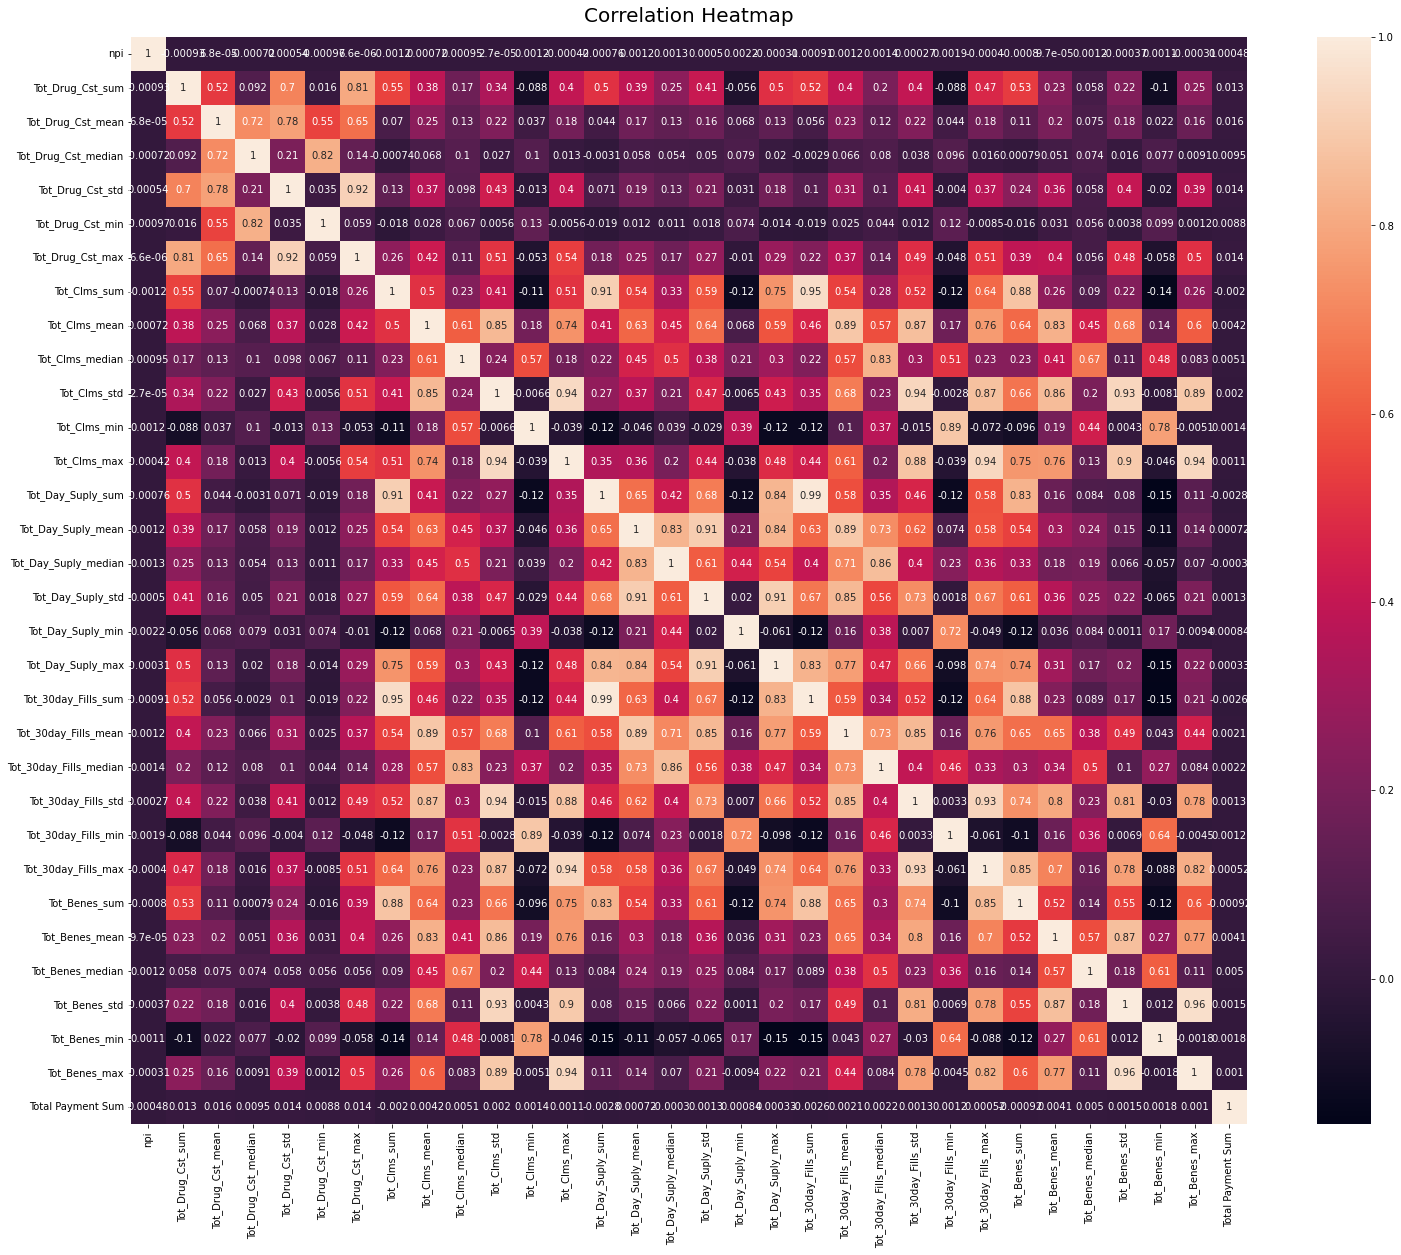

In [11]:
plt.figure(figsize=(25, 20))
ax = sns.heatmap(df_corr, annot=True)
ax.set_title('Correlation Heatmap', fontdict={'fontsize':20}, pad=15);

In [12]:
cst = df[['Tot_Drug_Cst_sum', 'Tot_Drug_Cst_mean', 'Tot_Drug_Cst_median',
       'Tot_Drug_Cst_std', 'Tot_Drug_Cst_min', 'Tot_Drug_Cst_max', 'Total Payment Sum']]

cst.corr()

,Tot_Drug_Cst_sum,Tot_Drug_Cst_mean,Tot_Drug_Cst_median,Tot_Drug_Cst_std,Tot_Drug_Cst_min,Tot_Drug_Cst_max,Total Payment Sum
Tot_Drug_Cst_sum,1.000000,0.524048,0.091673,0.700015,0.015761,0.805928,0.013306
Tot_Drug_Cst_mean,0.524048,1.000000,0.720717,0.780425,0.548025,0.648664,0.015784
Tot_Drug_Cst_median,0.091673,0.720717,1.000000,0.210316,0.820130,0.141184,0.009505
Tot_Drug_Cst_std,0.700015,0.780425,0.210316,1.000000,0.034634,0.918819,0.013732
Tot_Drug_Cst_min,0.015761,0.548025,0.820130,0.034634,1.000000,0.059319,0.008827
Tot_Drug_Cst_max,0.805928,0.648664,0.141184,0.918819,0.059319,1.000000,0.013531
Total Payment Sum,0.013306,0.015784,0.009505,0.013732,0.008827,0.013531,1.000000


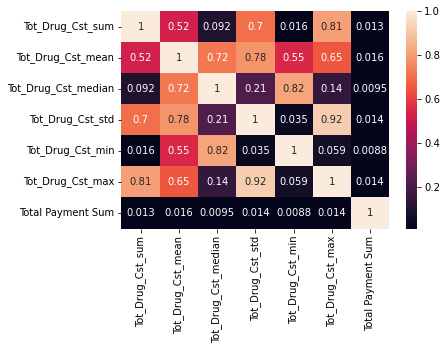

In [13]:
ax = sns.heatmap(cst.corr(), annot=True)
plt.show()

In [14]:
clms = df[['Tot_Clms_sum', 'Tot_Clms_mean', 'Tot_Clms_median', 'Tot_Clms_std',
       'Tot_Clms_min', 'Tot_Clms_max', 'Total Payment Sum']]

clms.corr()

,Tot_Clms_sum,Tot_Clms_mean,Tot_Clms_median,Tot_Clms_std,Tot_Clms_min,Tot_Clms_max,Total Payment Sum
Tot_Clms_sum,1.000000,0.500672,0.227508,0.412072,-0.110587,0.505550,-0.001950
Tot_Clms_mean,0.500672,1.000000,0.611261,0.847167,0.184380,0.741384,0.004188
Tot_Clms_median,0.227508,0.611261,1.000000,0.236176,0.568561,0.182411,0.005127
Tot_Clms_std,0.412072,0.847167,0.236176,1.000000,-0.006611,0.941554,0.001967
Tot_Clms_min,-0.110587,0.184380,0.568561,-0.006611,1.000000,-0.039406,0.001442
Tot_Clms_max,0.505550,0.741384,0.182411,0.941554,-0.039406,1.000000,0.001113
Total Payment Sum,-0.001950,0.004188,0.005127,0.001967,0.001442,0.001113,1.000000


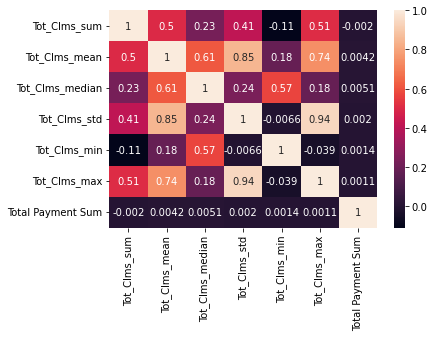

In [15]:
ax = sns.heatmap(clms.corr(), annot=True)
plt.show()

In [16]:
day = df[['Tot_Day_Suply_sum','Tot_Day_Suply_mean', 'Tot_Day_Suply_median', 'Tot_Day_Suply_std',
'Tot_Day_Suply_min', 'Tot_Day_Suply_max', 'Total Payment Sum']]

day.corr()

,Tot_Day_Suply_sum,Tot_Day_Suply_mean,Tot_Day_Suply_median,Tot_Day_Suply_std,Tot_Day_Suply_min,Tot_Day_Suply_max,Total Payment Sum
Tot_Day_Suply_sum,1.000000,0.648795,0.424307,0.681675,-0.118186,0.840926,-0.002788
Tot_Day_Suply_mean,0.648795,1.000000,0.834863,0.905766,0.208017,0.836437,0.000715
Tot_Day_Suply_median,0.424307,0.834863,1.000000,0.605652,0.442928,0.544624,-0.000304
Tot_Day_Suply_std,0.681675,0.905766,0.605652,1.000000,0.019655,0.910874,0.001264
Tot_Day_Suply_min,-0.118186,0.208017,0.442928,0.019655,1.000000,-0.061405,0.000837
Tot_Day_Suply_max,0.840926,0.836437,0.544624,0.910874,-0.061405,1.000000,0.000333
Total Payment Sum,-0.002788,0.000715,-0.000304,0.001264,0.000837,0.000333,1.000000


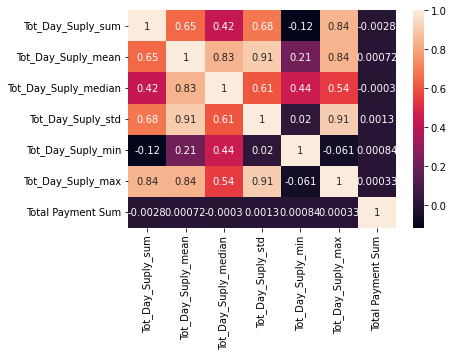

In [17]:
ax = sns.heatmap(day.corr(), annot=True)
plt.show()

In [18]:
day30 = df[['Tot_30day_Fills_sum','Tot_30day_Fills_mean', 'Tot_30day_Fills_median', 'Tot_30day_Fills_std',
'Tot_30day_Fills_min', 'Tot_30day_Fills_max','Total Payment Sum']]

day30.corr()

,Tot_30day_Fills_sum,Tot_30day_Fills_mean,Tot_30day_Fills_median,Tot_30day_Fills_std,Tot_30day_Fills_min,Tot_30day_Fills_max,Total Payment Sum
Tot_30day_Fills_sum,1.000000,0.594305,0.342727,0.520349,-0.121053,0.643198,-0.002650
Tot_30day_Fills_mean,0.594305,1.000000,0.734362,0.848604,0.164822,0.758084,0.002052
Tot_30day_Fills_median,0.342727,0.734362,1.000000,0.395010,0.463438,0.330890,0.002184
Tot_30day_Fills_std,0.520349,0.848604,0.395010,1.000000,0.003309,0.930504,0.001345
Tot_30day_Fills_min,-0.121053,0.164822,0.463438,0.003309,1.000000,-0.060689,0.001173
Tot_30day_Fills_max,0.643198,0.758084,0.330890,0.930504,-0.060689,1.000000,0.000522
Total Payment Sum,-0.002650,0.002052,0.002184,0.001345,0.001173,0.000522,1.000000


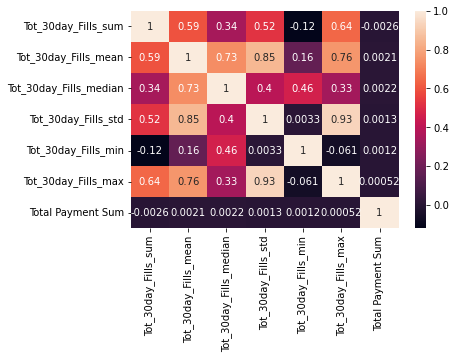

In [19]:
ax = sns.heatmap(day30.corr(), annot=True)
plt.show()

In [20]:
benes = df[['Tot_Benes_sum','Tot_Benes_mean', 'Tot_Benes_median', 'Tot_Benes_std', 'Tot_Benes_min',
'Tot_Benes_max', 'Total Payment Sum']]

benes.corr()

,Tot_Benes_sum,Tot_Benes_mean,Tot_Benes_median,Tot_Benes_std,Tot_Benes_min,Tot_Benes_max,Total Payment Sum
Tot_Benes_sum,1.000000,0.523682,0.139352,0.546142,-0.120623,0.596378,-0.000916
Tot_Benes_mean,0.523682,1.000000,0.570366,0.868640,0.269452,0.766972,0.004065
Tot_Benes_median,0.139352,0.570366,1.000000,0.177063,0.608047,0.105241,0.005040
Tot_Benes_std,0.546142,0.868640,0.177063,1.000000,0.011642,0.960112,0.001522
Tot_Benes_min,-0.120623,0.269452,0.608047,0.011642,1.000000,-0.001816,0.001832
Tot_Benes_max,0.596378,0.766972,0.105241,0.960112,-0.001816,1.000000,0.001004
Total Payment Sum,-0.000916,0.004065,0.005040,0.001522,0.001832,0.001004,1.000000


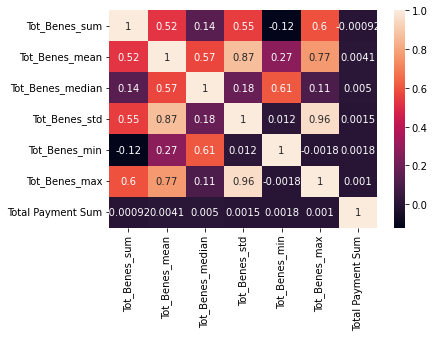

In [21]:
ax = sns.heatmap(benes.corr(), annot=True)
plt.show()

### Categorical Features

In [22]:
cat

['npi', 'city', 'state', 'last_name', 'first_name', 'Speciality type']

In [23]:
from termcolor import colored

In [24]:
for col in df.columns:
    if col in cat:
        print(colored(col, 'red', attrs=['bold']))
        print(df[col].unique())
        print()
        print("Number of Unique of {}'s:".format(col), len(df[col].unique()))
        print()

npi
[1003000126 1003000142 1003000167 ... 1992999825 1992999833 1992999874]

Number of Unique of npi's: 985533

city
['CUMBERLAND' 'TOLEDO' 'DAYTON' ... 'NASHVILLE, TENNESSEE' 'FT. DUCHESNE'
 'ROSS']

Number of Unique of city's: 12185

state
['MD' 'OH' 'NV' 'TN' 'FL' 'PA' 'OK' 'NC' 'NM' 'CA' 'KY' 'SC' 'CT' 'CO'
 'NY' 'TX' 'NJ' 'MI' 'MA' 'MS' 'OR' 'ID' 'WA' 'NH' 'MN' 'DC' 'GA' 'VA'
 'IA' 'ND' 'IN' 'NE' 'AZ' 'IL' 'AL' 'LA' 'PR' 'AR' 'WI' 'HI' 'KS' 'RI'
 'MO' 'WV' 'VT' 'UT' 'ME' 'MT' 'DE' 'WY' 'SD' 'AK' 'ZZ' 'GU' 'VI' 'MP'
 'AA' 'AE' 'AP' 'XX' 'AS']

Number of Unique of state's: 61

last_name
['ENKESHAFI' 'KHALIL' 'ESCOBAR' ... 'MANGILI' 'TSIRKIN' 'RIVERA MENDEZ']

Number of Unique of last_name's: 237097

first_name
['ARDALAN' 'RASHID' 'JULIO' ... 'NATSURANG' 'SESHASREE' 'L. NOAH']

Number of Unique of first_name's: 75378

Speciality type
['INTERNAL MEDICINE' 'ANESTHESIOLOGY' 'DENTIST' 'NURSE PRACTITIONER'
 'OBSTETRICS & GYNECOLOGY' 'FAMILY PRACTICE' 'UROLOGY' 'PHARMACIST'
 'CARDIOLOGY' '

In [25]:
for col in df.columns:
    if col in cat:
        print(colored(col, 'red', attrs=['bold']))
        print(df[col].value_counts())
        print()

npi
1396984068    6
1427157064    6
1710040860    6
1649517251    6
1992766448    5
             ..
1356340343    1
1356340384    1
1356340509    1
1356340517    1
1992999874    1
Name: npi, Length: 985533, dtype: int64

city
NEW YORK           15980
HOUSTON            11119
CHICAGO            10187
PHILADELPHIA        8838
LOS ANGELES         8686
                   ...  
RANCHO CHORDOVA        1
CAPE MAY C.H.          1
SILISBURY              1
RICH                   1
WENHAM                 1
Name: city, Length: 12185, dtype: int64

state
CA    115795
NY     81043
TX     74456
FL     74368
PA     52880
       ...  
AP        38
MP        20
AA        15
XX        13
AS         1
Name: state, Length: 61, dtype: int64

last_name
PATEL                 6494
SMITH                 6017
LEE                   4786
JOHNSON               4365
NGUYEN                3953
                      ... 
EDLUKUDIGE KESHAVA       1
HIRALDO-INFANTE          1
ORTEGA SOTOLONGO         1
EL SABAWI        

### Number of Prescriber According to Specialty (Top 50)

In [26]:
SpecialtyCount = pd.DataFrame(df[['Speciality type','npi']].groupby('Speciality type').count())
SpecialtyCount.reset_index(level=0, inplace=True)
SpecialtyCount.columns = ['Specialty', 'Total_Prescribers']
SpecialtyCount = SpecialtyCount.fillna(0)
SpecialtyCount = SpecialtyCount.sort_values('Total_Prescribers')
SpecialtyCount = SpecialtyCount[-50::]
SpecialtyCount.head()

,Specialty,Total_Prescribers
28,COLORECTAL SURGERY (PROCTOLOGY),1524
41,DIAGNOSTIC RADIOLOGY,1640
33,CRITICAL CARE (INTENSIVISTS),1658
102,NEUROPSYCHIATRY,1760
55,GERIATRIC MEDICINE,1999


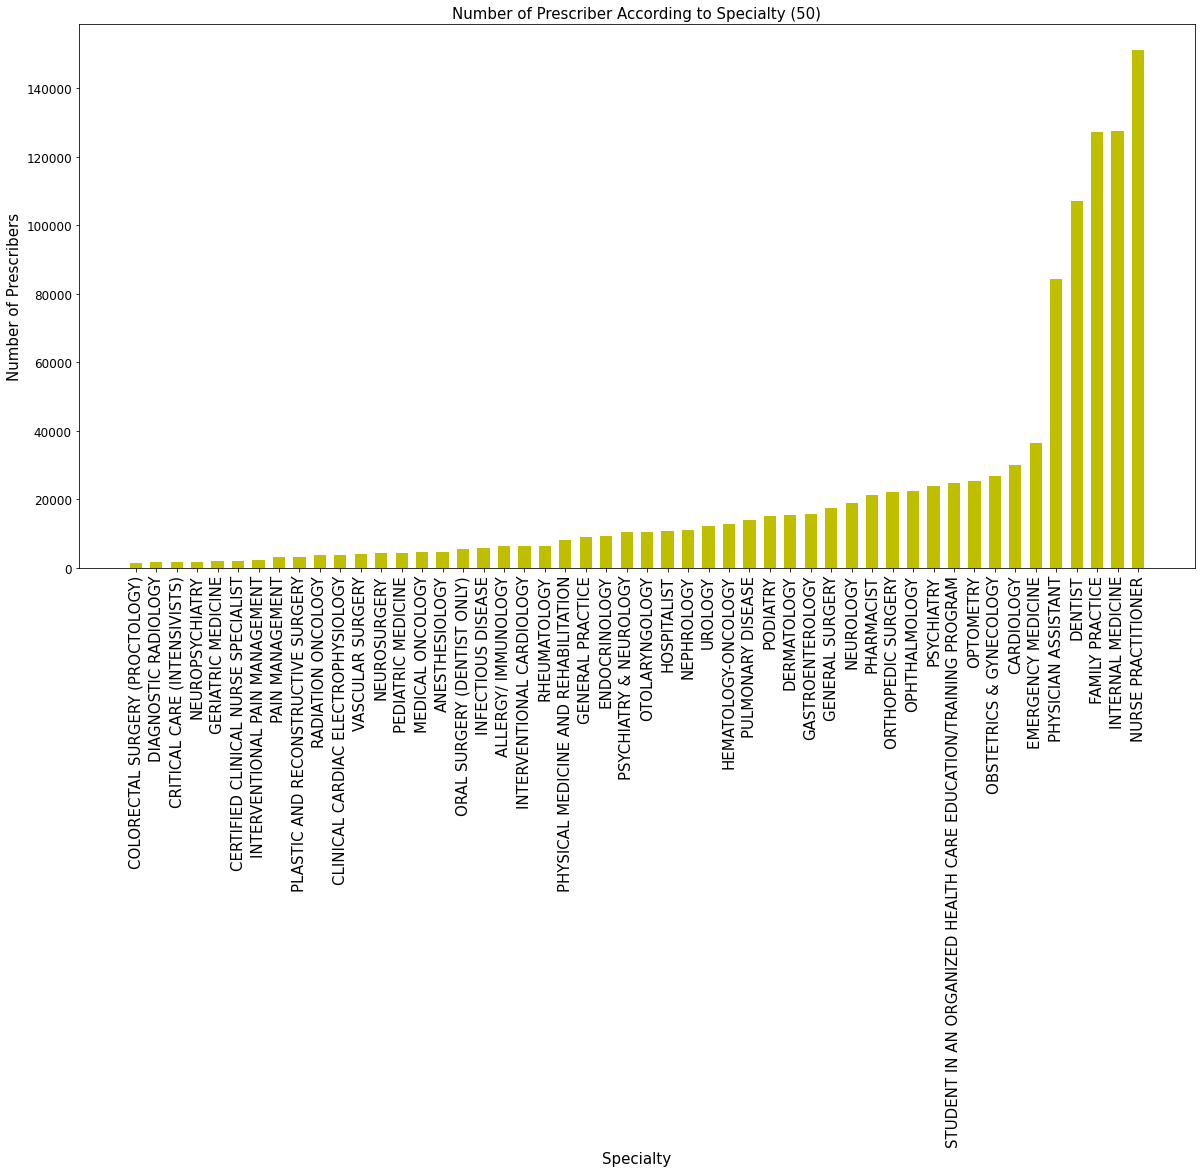

In [27]:
fig = plt.gcf()
fig.set_size_inches( 20, 10)

N = SpecialtyCount.shape[0]
ind = np.arange(N)
width = 0.6

plt.bar(ind, SpecialtyCount['Total_Prescribers'], width, color='y')

# plt.ylim([0,120])
plt.yticks(fontsize=12)
plt.ylabel("Number of Prescribers", fontsize=15)
plt.xticks(ind,SpecialtyCount['Specialty'], fontsize=15, rotation=90)
plt.xlabel('Specialty', fontsize=15)
plt.title("Number of Prescriber According to Specialty (50)", fontsize=15)
plt.show()

### Number of Prescribers according to State

In [28]:
StateCount = pd.DataFrame(df[['state','npi']].groupby('state').count())
StateCount.reset_index(level=0, inplace=True)
StateCount.columns = ['State', 'Total_Prescribers']
StateCount = StateCount.fillna(0)
StateCount = StateCount.sort_values('Total_Prescribers')
StateCount.head()

,State,Total_Prescribers
6,AS,1
59,XX,13
0,AA,15
30,MP,20
4,AP,38


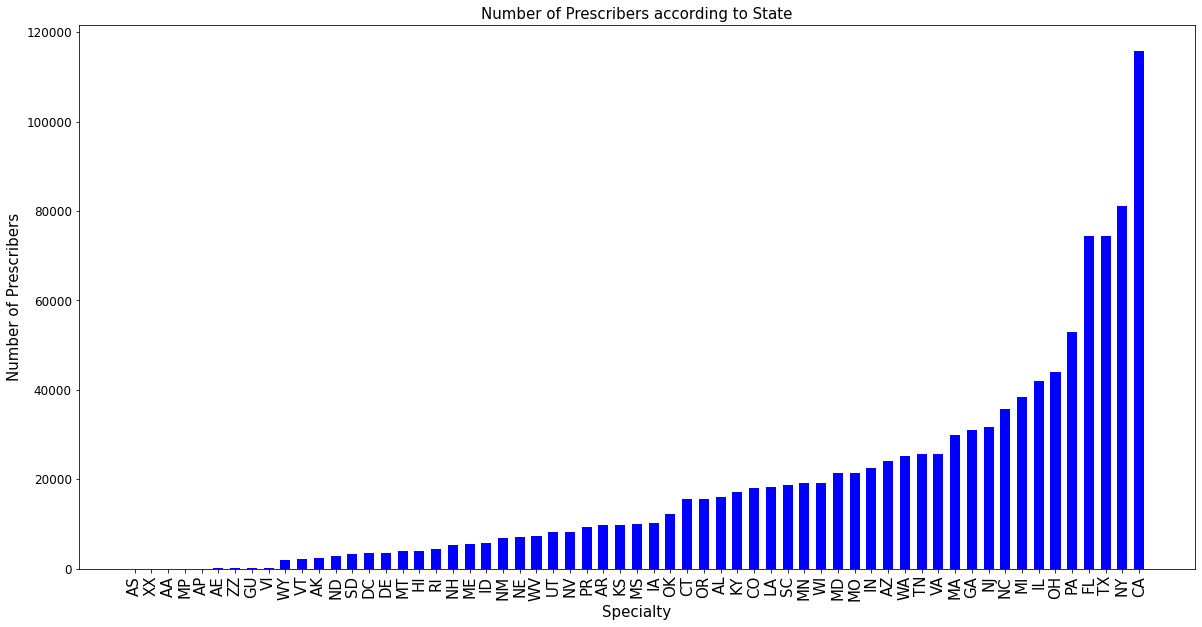

In [29]:
fig = plt.gcf()
fig.set_size_inches( 20, 10)

N = StateCount.shape[0]
ind = np.arange(N)
width = 0.6

plt.bar(ind, StateCount['Total_Prescribers'], width, color='b')

# plt.ylim([0,120])
plt.yticks(fontsize=12)
plt.ylabel("Number of Prescribers", fontsize=15)
plt.xticks(ind,StateCount['State'], fontsize=15, rotation=90)
plt.xlabel('Specialty', fontsize=15)
plt.title("Number of Prescribers according to State", fontsize=15)
plt.show()

### Number of Prescribers according to City (Top 50)

In [30]:
CityCount = pd.DataFrame(df[['city','npi']].groupby('city').count())
CityCount.reset_index(level=0, inplace=True)
CityCount.columns = ['City', 'Total_Prescribers']
CityCount = CityCount.fillna(0)
CityCount = CityCount.sort_values('Total_Prescribers')
CityCount = CityCount[-50::]
CityCount.head()

,City,Total_Prescribers
6145,MADISON,2962
6745,MILWAUKEE,3106
5188,KANSAS CITY,3135
7934,OMAHA,3155
97,ALBUQUERQUE,3166


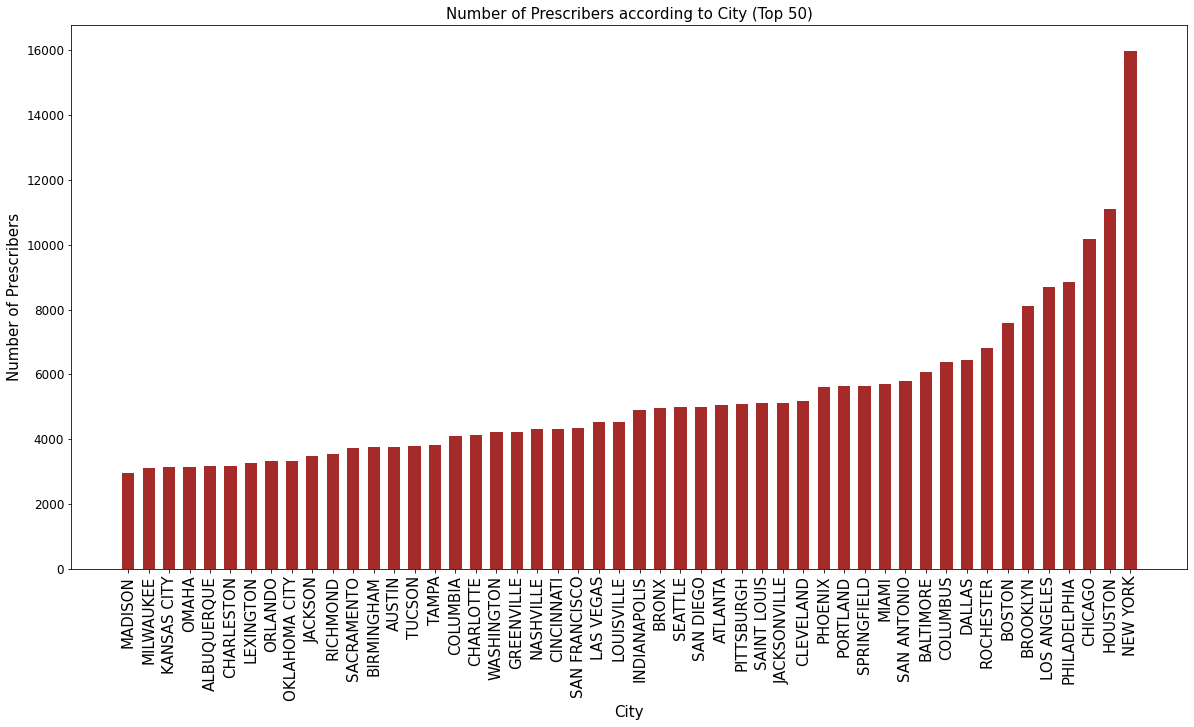

In [31]:
fig = plt.gcf()
fig.set_size_inches( 20, 10)

N = CityCount.shape[0]
ind = np.arange(N)
width = 0.6

plt.bar(ind, CityCount['Total_Prescribers'], width, color='brown')

# plt.ylim([0,120])
plt.yticks(fontsize=12)
plt.ylabel("Number of Prescribers", fontsize=15)
plt.xticks(ind,CityCount['City'], fontsize=15, rotation=90)
plt.xlabel('City', fontsize=15)
plt.title("Number of Prescribers according to City (Top 50)", fontsize=15)
plt.show()

### Top 50 Specialty Type with Highest Total Payment

In [32]:
SpecialtyPaymentCount = pd.DataFrame(df[['Speciality type','Total Payment Sum']].groupby('Speciality type').count())
SpecialtyPaymentCount.reset_index(level=0, inplace=True)
SpecialtyPaymentCount.columns = ['Specialty', 'Total Payment']
SpecialtyPaymentCount = SpecialtyPaymentCount.fillna(0)
SpecialtyPaymentCount = SpecialtyPaymentCount.sort_values('Total Payment')
SpecialtyPaymentCount = SpecialtyPaymentCount[-50::]
SpecialtyPaymentCount.tail()

,Specialty,Total Payment
138,PHYSICIAN ASSISTANT,84422
38,DENTIST,106960
50,FAMILY PRACTICE,127233
74,INTERNAL MEDICINE,127476
106,NURSE PRACTITIONER,151123


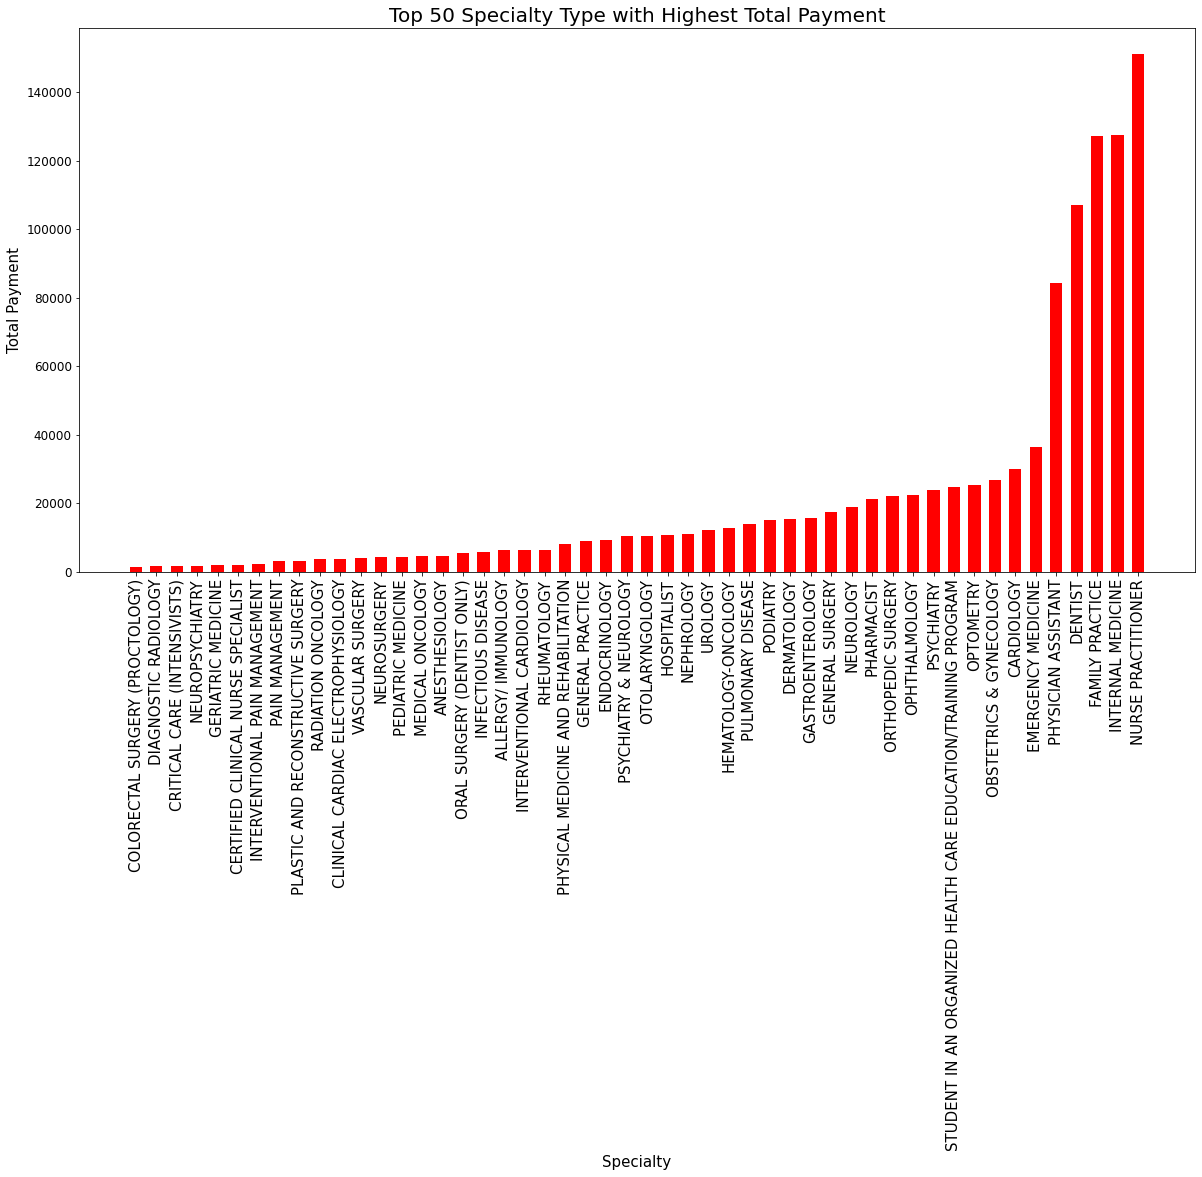

In [33]:
fig = plt.gcf()
fig.set_size_inches( 20, 10)

N = SpecialtyPaymentCount.shape[0]
ind = np.arange(N)
width = 0.6

plt.bar(ind, SpecialtyPaymentCount['Total Payment'], width, color='r')

# plt.ylim([0,120])
plt.yticks(fontsize=12)
plt.ylabel("Total Payment", fontsize=15)
plt.xticks(ind,SpecialtyPaymentCount['Specialty'], fontsize=15, rotation=90)
plt.xlabel('Specialty', fontsize=15)
plt.title("Top 50 Specialty Type with Highest Total Payment", fontsize=20)
plt.show()

### State Total Payment Ranking

In [34]:
StatePaymentCount = pd.DataFrame(df[['state','Total Payment Sum']].groupby('state').count())
StatePaymentCount.reset_index(level=0, inplace=True)
StatePaymentCount.columns = ['State', 'Total Payment']
StatePaymentCount = StatePaymentCount.fillna(0)
StatePaymentCount = StatePaymentCount.sort_values('Total Payment')
StatePaymentCount.head()

,State,Total Payment
6,AS,1
59,XX,13
0,AA,15
30,MP,20
4,AP,38


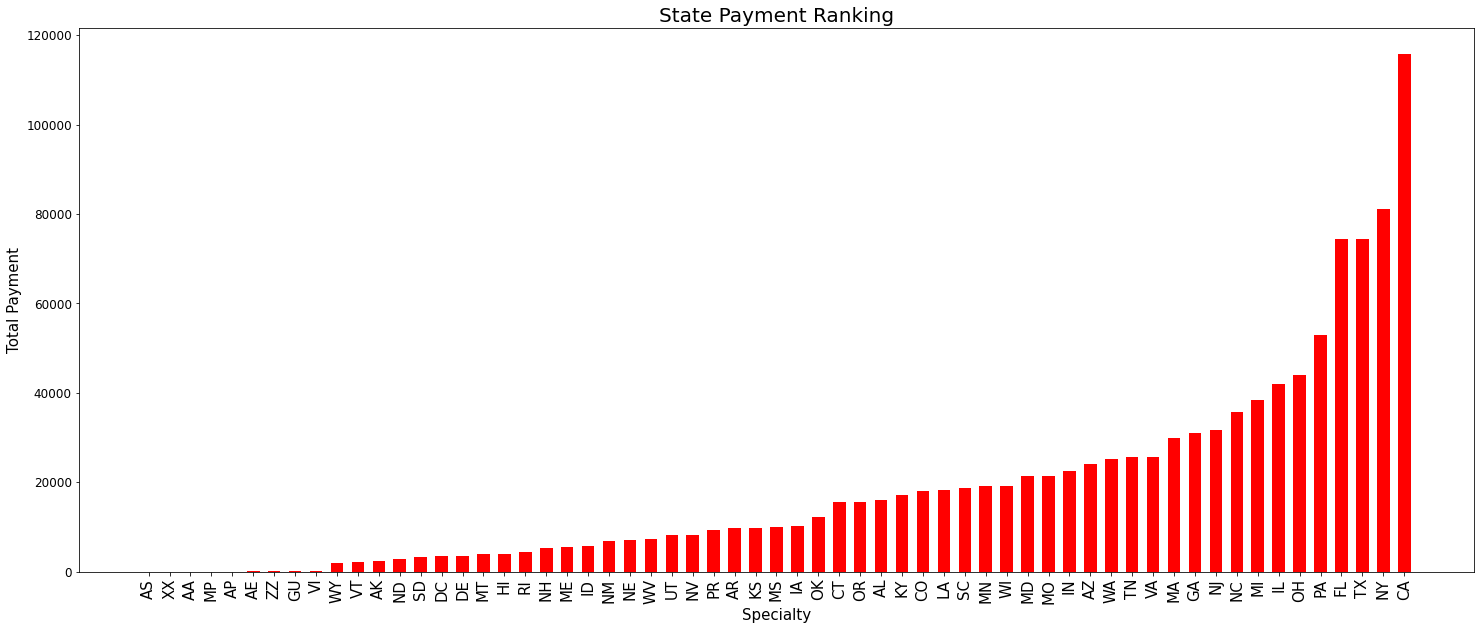

In [35]:
fig = plt.gcf()
fig.set_size_inches( 25, 10)

N = StatePaymentCount.shape[0]
ind = np.arange(N)
width = 0.6

plt.bar(ind, StatePaymentCount['Total Payment'], width, color='r')

# plt.ylim([0,120])
plt.yticks(fontsize=12)
plt.ylabel("Total Payment", fontsize=15)
plt.xticks(ind,StatePaymentCount['State'], fontsize=15, rotation=90)
plt.xlabel('Specialty', fontsize=15)
plt.title("State Payment Ranking", fontsize=20)
plt.show()

### Top 50 Cities with Highest Total Payment

In [36]:
CityPaymentCount = pd.DataFrame(df[['city','Total Payment Sum']].groupby('city').count())
CityPaymentCount.reset_index(level=0, inplace=True)
CityPaymentCount.columns = ['City', 'Total Payment']
CityPaymentCount = CityPaymentCount.fillna(0)
CityPaymentCount = CityPaymentCount.sort_values('Total Payment')
CityPaymentCount = CityPaymentCount[-50::]
CityPaymentCount.head()

,City,Total Payment
6145,MADISON,2962
6745,MILWAUKEE,3106
5188,KANSAS CITY,3135
7934,OMAHA,3155
97,ALBUQUERQUE,3166


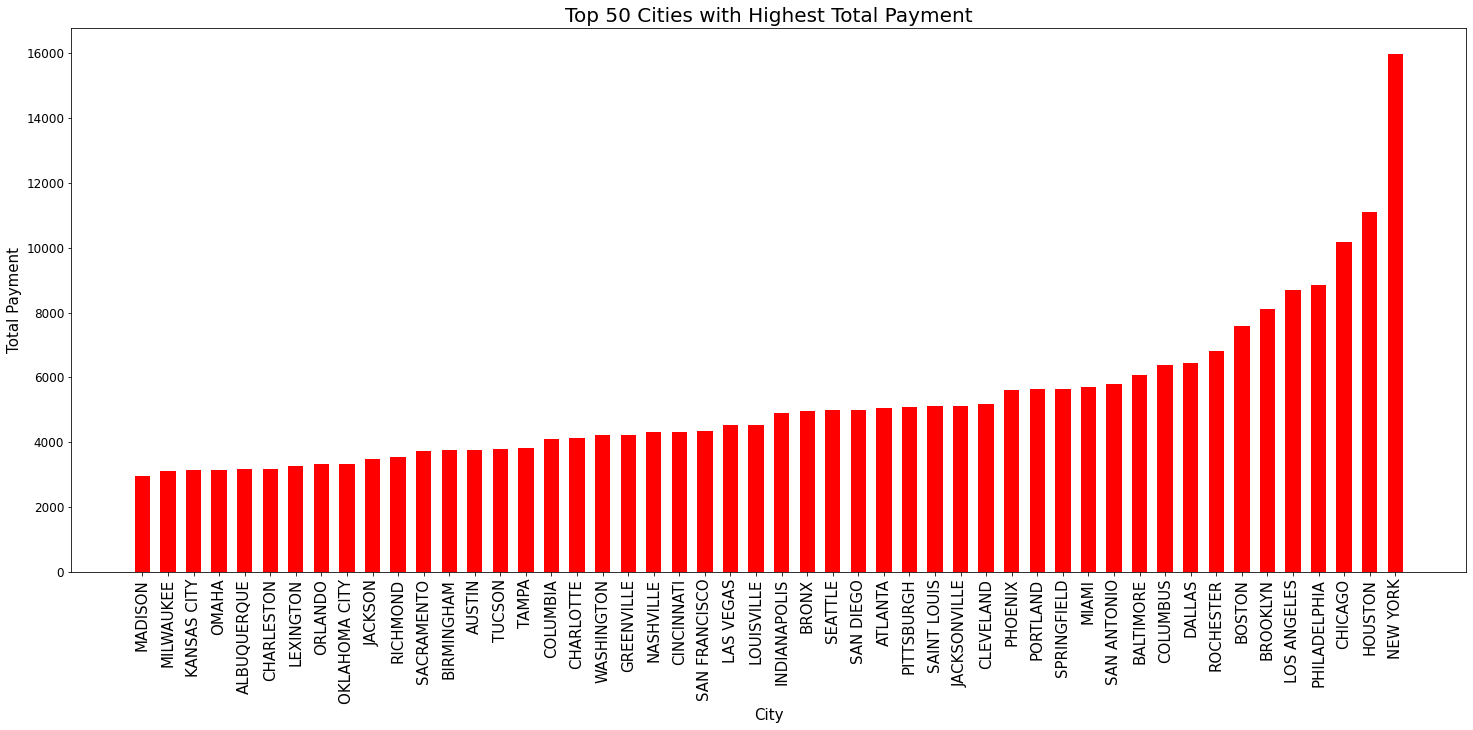

In [37]:
fig = plt.gcf()
fig.set_size_inches( 25, 10)

N = CityPaymentCount.shape[0]
ind = np.arange(N)
width = 0.6

plt.bar(ind, CityPaymentCount['Total Payment'], width, color='r')

# plt.ylim([0,120])
plt.yticks(fontsize=12)
plt.ylabel("Total Payment", fontsize=15)
plt.xticks(ind,CityPaymentCount['City'], fontsize=15, rotation=90)
plt.xlabel('City', fontsize=15)
plt.title("Top 50 Cities with Highest Total Payment", fontsize=20)
plt.show()

In [38]:
cat

['npi', 'city', 'state', 'last_name', 'first_name', 'Speciality type']

In [39]:
LastNamePaymentCount = pd.DataFrame(df[['last_name','Total Payment Sum']].groupby('last_name').count())
LastNamePaymentCount.reset_index(level=0, inplace=True)
LastNamePaymentCount.columns = ['last name', 'Total Payment']
LastNamePaymentCount = LastNamePaymentCount.fillna(0)
LastNamePaymentCount = LastNamePaymentCount.sort_values('Total Payment')
LastNamePaymentCount = LastNamePaymentCount[-50::]
LastNamePaymentCount.tail()

,last name,Total Payment
150148,NGUYEN,3953
100360,JOHNSON,4365
120485,LEE,4786
198390,SMITH,6017
161241,PATEL,6494


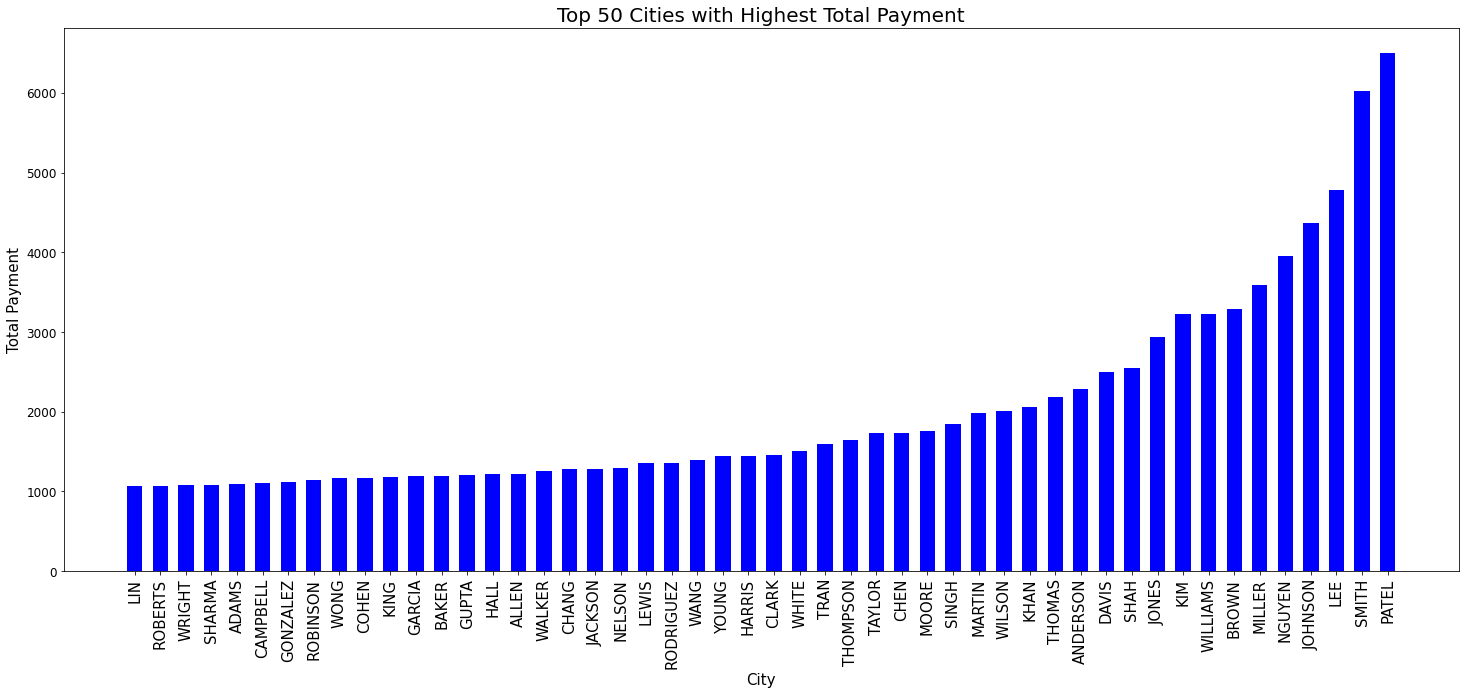

In [40]:
fig = plt.gcf()
fig.set_size_inches( 25, 10)

N = LastNamePaymentCount.shape[0]
ind = np.arange(N)
width = 0.6

plt.bar(ind, LastNamePaymentCount['Total Payment'], width, color='blue')

# plt.ylim([0,120])
plt.yticks(fontsize=12)
plt.ylabel("Total Payment", fontsize=15)
plt.xticks(ind,LastNamePaymentCount['last name'], fontsize=15, rotation=90)
plt.xlabel('City', fontsize=15)
plt.title("Top 50 Cities with Highest Total Payment", fontsize=20)
plt.show()

In [41]:
FirstNamePaymentCount = pd.DataFrame(df[['first_name','Total Payment Sum']].groupby('first_name').count())
FirstNamePaymentCount.reset_index(level=0, inplace=True)
FirstNamePaymentCount.columns = ['first name', 'Total Payment']
FirstNamePaymentCount = FirstNamePaymentCount.fillna(0)
FirstNamePaymentCount = FirstNamePaymentCount.sort_values('Total Payment')
FirstNamePaymentCount = FirstNamePaymentCount[-50::]
FirstNamePaymentCount.tail()

,first name,Total Payment
27148,JAMES,14884
55142,ROBERT,16129
29740,JOHN,19174
13963,DAVID,19857
42955,MICHAEL,21974


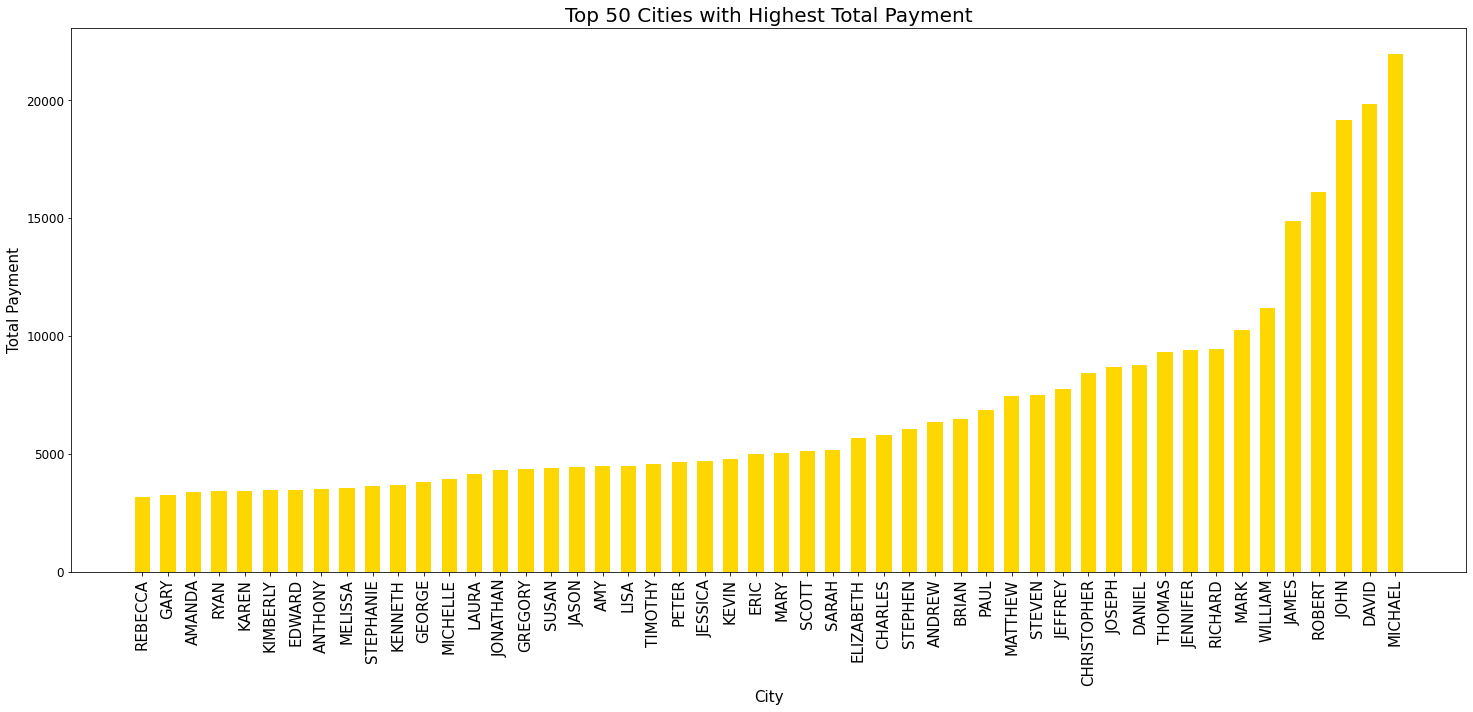

In [42]:
fig = plt.gcf()
fig.set_size_inches( 25, 10)

N = FirstNamePaymentCount.shape[0]
ind = np.arange(N)
width = 0.6

plt.bar(ind, FirstNamePaymentCount['Total Payment'], width, color='gold')

# plt.ylim([0,120])
plt.yticks(fontsize=12)
plt.ylabel("Total Payment", fontsize=15)
plt.xticks(ind,FirstNamePaymentCount['first name'], fontsize=15, rotation=90)
plt.xlabel('City', fontsize=15)
plt.title("Top 50 Cities with Highest Total Payment", fontsize=20)
plt.show()

In [52]:
CityCount = pd.DataFrame(df[['city','npi']].groupby('city').count())
CityCount.reset_index(level=0, inplace=True)
CityCount.columns = ['City', 'Total_Prescribers']
CityCount = CityCount.fillna(0)
CityCount = CityCount.sort_values('Total_Prescribers')
CityCount = CityCount[-50::]
CityCount.head()

,City,Total_Prescribers
6145,MADISON,2962
6745,MILWAUKEE,3106
5188,KANSAS CITY,3135
7934,OMAHA,3155
97,ALBUQUERQUE,3166


In [53]:
CityCount_fraud = pd.DataFrame(df.loc[df['Target'] == 'FRAUD',['city','npi']].groupby('city').count())
CityCount_fraud.reset_index(level=0, inplace=True)
CityCount_fraud.columns = ['City', 'Fraud']
CityCount_fraud.head()
CityCount = pd.merge(CityCount, CityCount_fraud,  how='left', on="City")
CityCount = CityCount.fillna(0)
CityCount = CityCount.sort_values('Total_Prescribers')
CityCount

,City,Total_Prescribers,Fraud
0,MADISON,2962,0.0
1,MILWAUKEE,3106,2.0
2,KANSAS CITY,3135,1.0
3,OMAHA,3155,0.0
4,ALBUQUERQUE,3166,0.0
5,CHARLESTON,3188,0.0
6,LEXINGTON,3264,0.0
7,ORLANDO,3341,2.0
8,OKLAHOMA CITY,3341,1.0
9,JACKSON,3490,1.0


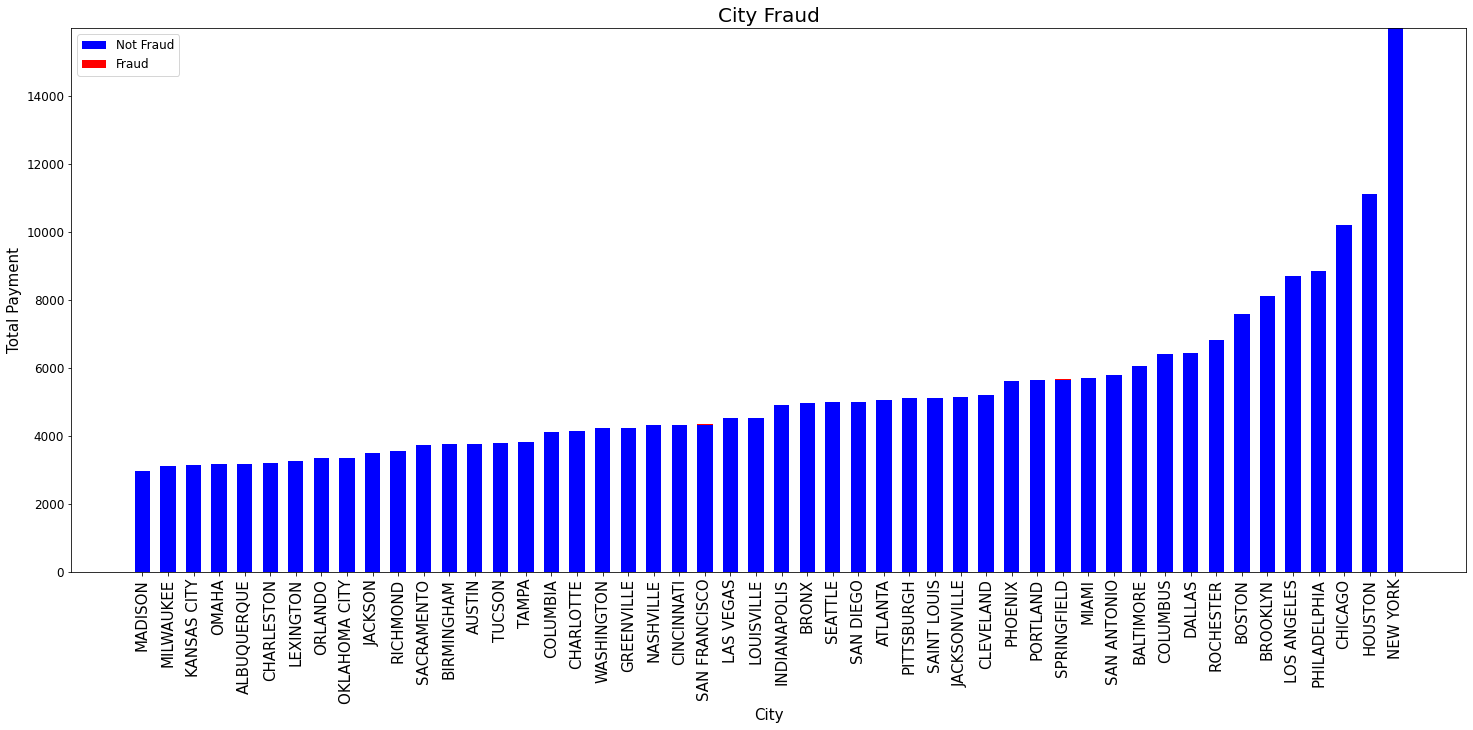

In [55]:
fig = plt.gcf()
fig.set_size_inches( 25, 10)

N = CityCount.shape[0]
ind = np.arange(N)
width = 0.6

p1 = plt.bar(ind, CityCount['Total_Prescribers']-CityCount['Fraud'], width, color='b')
p2 = plt.bar(ind, CityCount['Fraud'], width, bottom=CityCount['Total_Prescribers']-CityCount['Fraud'], color='r')

# plt.ylim([0,120])
plt.yticks(fontsize=12)
plt.ylabel("Total Payment", fontsize=15)
plt.xticks(ind, CityCount['City'], fontsize=15, rotation=90)
plt.xlabel('City', fontsize=15)
plt.title("City Fraud", fontsize=20)
plt.legend([p1[0], p2[0]], ["Not Fraud","Fraud"], fontsize=12, fancybox=True)
plt.show()

In [62]:
StateCount = pd.DataFrame(df[['state','npi']].groupby('state').count())
StateCount.reset_index(level=0, inplace=True)
StateCount.columns = ['State', 'Total_Prescribers']
StateCount.head()

,State,Total_Prescribers
0,AA,15
1,AE,62
2,AK,2277
3,AL,16060
4,AP,38


In [63]:
StateCount_fraud = pd.DataFrame(df.loc[df['Target'] == 'FRAUD',['state','npi']].groupby('state').count())
StateCount_fraud.reset_index(level=0, inplace=True)
StateCount_fraud.columns = ['State', 'Fraud']
StateCount_fraud.head()
StateCount = pd.merge(StateCount, StateCount_fraud,  how='left', on="State")
StateCount = StateCount.fillna(0)
StateCount = StateCount.sort_values('Total_Prescribers')
StateCount

,State,Total_Prescribers,Fraud
6,AS,1,0.0
59,XX,13,0.0
0,AA,15,0.0
30,MP,20,0.0
4,AP,38,0.0
...,...,...,...
44,PA,52880,6.0
13,FL,74368,35.0
50,TX,74456,30.0
40,NY,81043,17.0


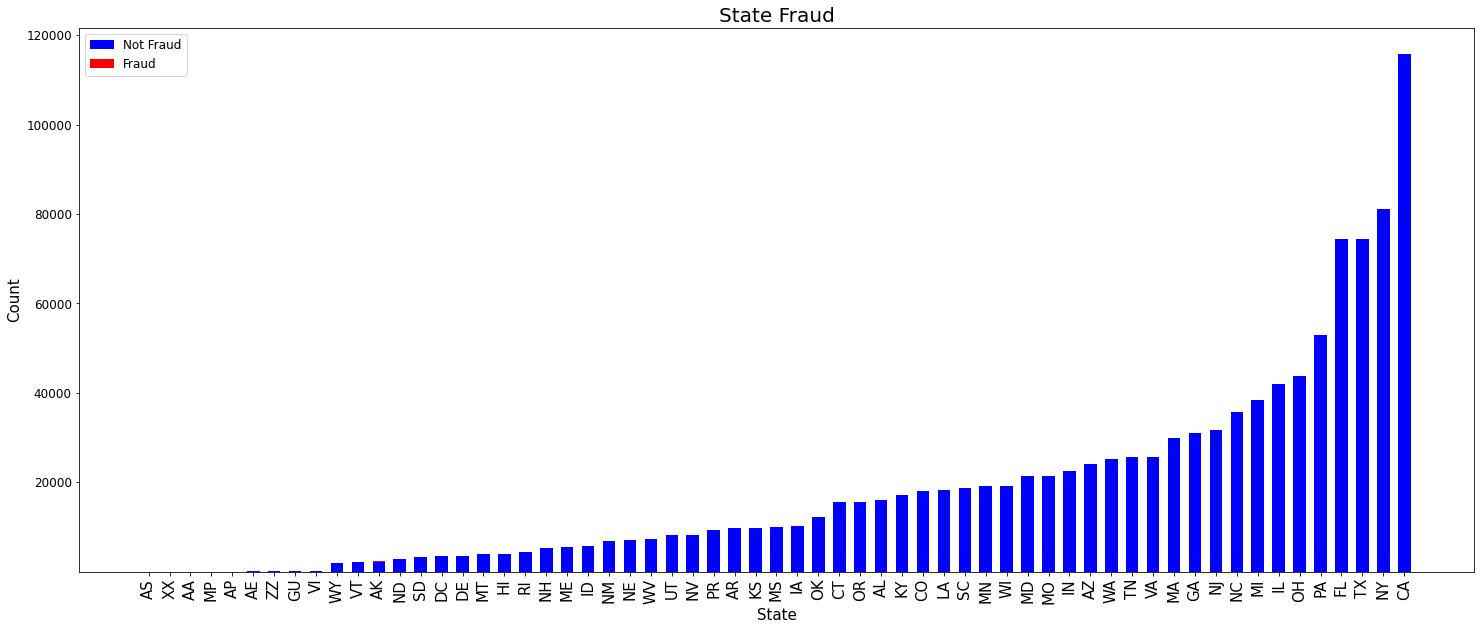

In [71]:
fig = plt.gcf()
fig.set_size_inches( 25, 10)

N = StateCount.shape[0]
ind = np.arange(N)
width = 0.6

p1 = plt.bar(ind, StateCount['Total_Prescribers']-StateCount['Fraud'], width, color='b')
p2 = plt.bar(ind, StateCount['Fraud'], width, bottom=StateCount['Total_Prescribers']-StateCount['Fraud'], color='r')

# plt.ylim([0,120])
plt.yticks(fontsize=12)
plt.ylabel("Count", fontsize=15)
plt.xticks(ind,StateCount['State'], fontsize=15, rotation=90)
plt.xlabel('State', fontsize=15)
plt.title("State Fraud", fontsize=20)
plt.legend([p1[0], p2[0]], ["Not Fraud","Fraud"], fontsize=12, fancybox=True)
plt.show()

In [66]:
SpecialtyCount = pd.DataFrame(df[['Speciality type','npi']].groupby('Speciality type').count())
SpecialtyCount.reset_index(level=0, inplace=True)
SpecialtyCount.columns = ['Specialty', 'Total_Prescribers']
SpecialtyCount = SpecialtyCount.fillna(0)
SpecialtyCount = SpecialtyCount.sort_values('Total_Prescribers')
SpecialtyCount = SpecialtyCount[-50::]
SpecialtyCount.head()

,Specialty,Total_Prescribers
28,COLORECTAL SURGERY (PROCTOLOGY),1524
41,DIAGNOSTIC RADIOLOGY,1640
33,CRITICAL CARE (INTENSIVISTS),1658
102,NEUROPSYCHIATRY,1760
55,GERIATRIC MEDICINE,1999


In [67]:
SpecialtyCount_fraud = pd.DataFrame(df.loc[df['Target'] == 'FRAUD',['Speciality type','npi']].groupby('Speciality type').count())
SpecialtyCount_fraud.reset_index(level=0, inplace=True)
SpecialtyCount_fraud.columns = ['Specialty', 'Fraud']
SpecialtyCount_fraud.head()
SpecialtyCount = pd.merge(SpecialtyCount, SpecialtyCount_fraud,  how='left', on="Specialty")
SpecialtyCount = SpecialtyCount.fillna(0)
SpecialtyCount = SpecialtyCount.sort_values('Total_Prescribers')
SpecialtyCount.head()

,Specialty,Total_Prescribers,Fraud
0,COLORECTAL SURGERY (PROCTOLOGY),1524,0.0
1,DIAGNOSTIC RADIOLOGY,1640,0.0
2,CRITICAL CARE (INTENSIVISTS),1658,0.0
3,NEUROPSYCHIATRY,1760,1.0
4,GERIATRIC MEDICINE,1999,0.0


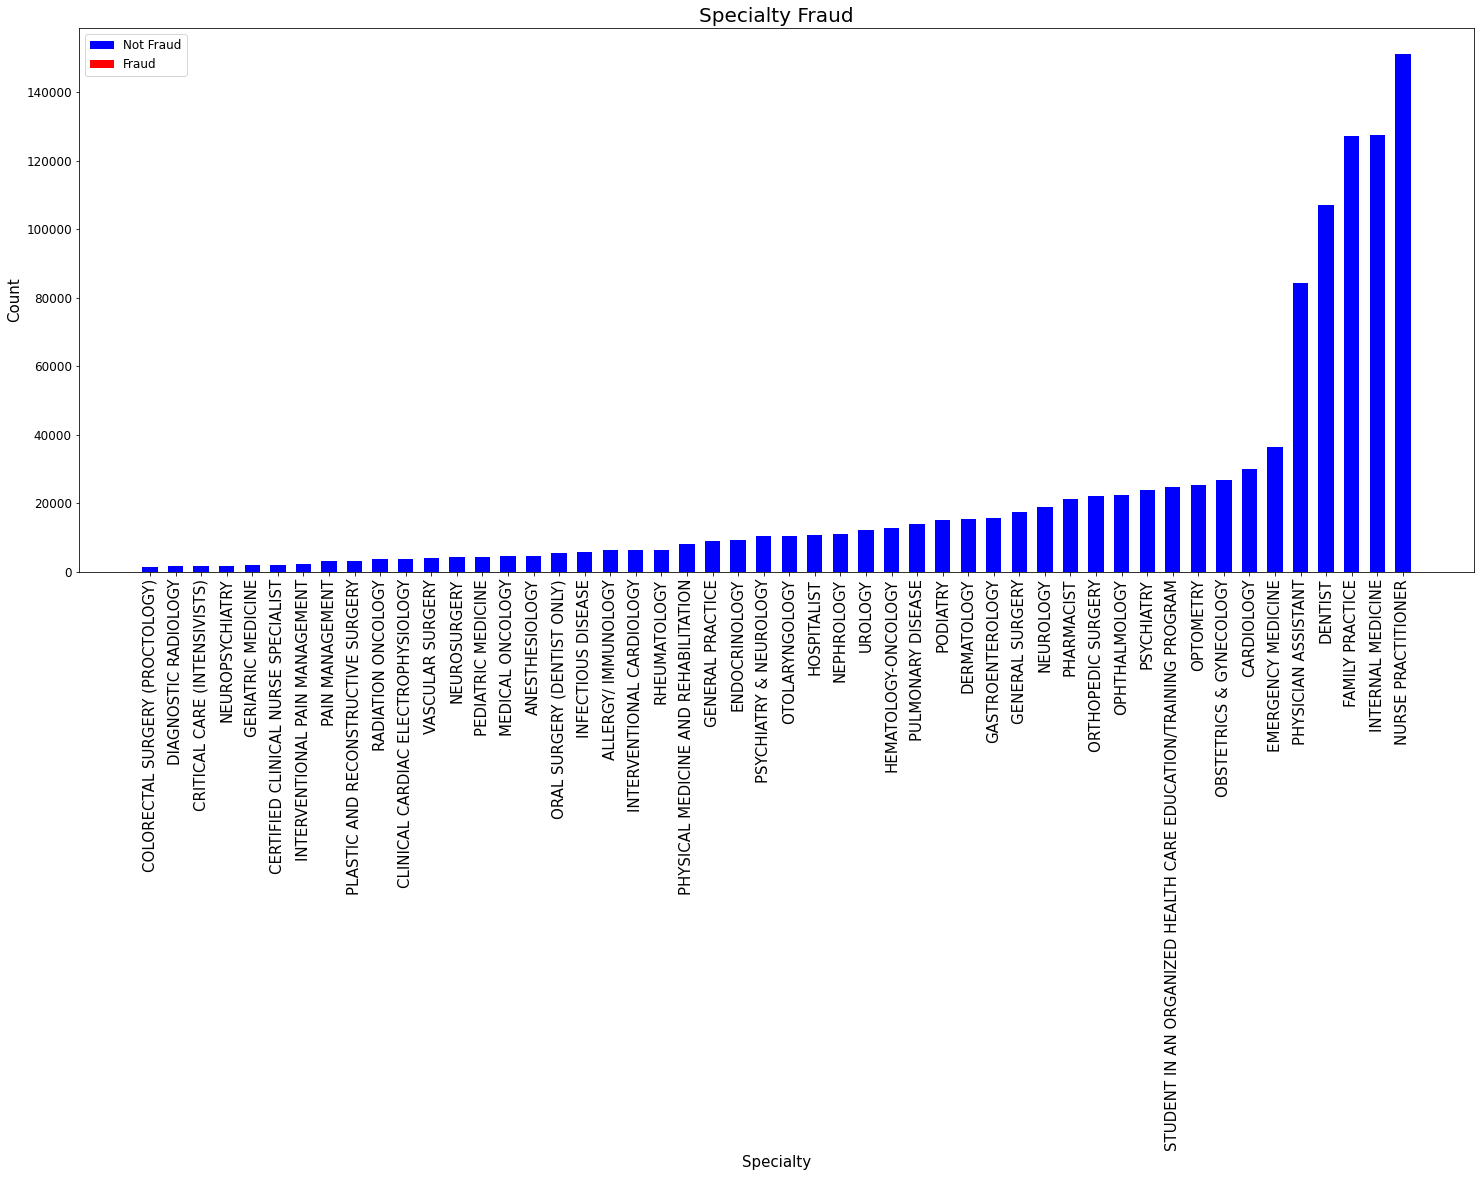

In [70]:
fig = plt.gcf()
fig.set_size_inches( 25, 10)

N = SpecialtyCount.shape[0]
ind = np.arange(N)
width = 0.6

p1 = plt.bar(ind, SpecialtyCount['Total_Prescribers']- SpecialtyCount['Fraud'], width, color='b')
p2 = plt.bar(ind, SpecialtyCount['Fraud'], width, bottom= SpecialtyCount['Total_Prescribers']-SpecialtyCount['Fraud'], color='r')

# plt.ylim([0,120])
plt.yticks(fontsize=12)
plt.ylabel("Count", fontsize=15)
plt.xticks(ind,SpecialtyCount['Specialty'], fontsize=15, rotation=90)
plt.xlabel('Specialty', fontsize=15)
plt.title("Specialty Fraud", fontsize=20)
plt.legend([p1[0], p2[0]], ["Not Fraud","Fraud"], fontsize=12, fancybox=True)
plt.show()